### Importing Libraries ###

In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
from functools import reduce

Read data csv

In [557]:
df_client_burea = pd.read_csv('Client_Bureau_Information.csv',delimiter=',',low_memory=False)
df_client_info = pd.read_csv('Client_Information.csv',delimiter=',',low_memory=False)
df_default_data = pd.read_csv('Default_Data.csv',delimiter=',',low_memory=False)
df_loan_info = pd.read_csv('Loan_Information.csv',delimiter=',',low_memory=False)

default data csv

In [558]:
df_default_data['classification_label'] = np.where(df_default_data.DVAL > 0, 1, df_default_data.DVAL)

In [559]:
df_default_data.classification_label.fillna(value=0, inplace=True)

In [560]:
df_default_data = df_default_data.drop(columns=['DVAL','DMON'])

In [561]:
df_default_data

,UID,RECORDNUMBER,classification_label
0,2a08b1c1-504b-4178-8c3f-942aa09c7732,8,1.0
1,039b68a8-0953-484f-a14a-0e1e78ef7794,7,1.0
2,225b6f92-6c66-45c1-bb82-7ed89aad9619,8,1.0
3,d10af710-591d-458e-b81f-85fb99d9c5a8,9,1.0
4,6457c750-e7c0-4309-9ca3-8dd2ddbabbc0,8,0.0
...,...,...,...
19995,9254241a-2c3c-45ba-bfc8-dad3a52500e0,4,1.0
19996,09e1ff4d-37eb-4561-ac5e-e88904097e00,13,0.0
19997,4db9fd90-1c68-4fc5-999e-8bc931899976,5,1.0
19998,9068454a-1595-4507-aeed-e10330a17aa8,4,1.0


loan info csv

In [562]:
# Dropping all row with missing values for REPAYPERIOD
df_loan_info = df_loan_info.dropna(subset=['REPAYPERIOD'])

In [563]:
df_loan_info = df_loan_info[(df_loan_info['REPAYPERIOD'] >= 12) & (df_loan_info['REPAYPERIOD'] <=60 )]

In [564]:
df_loan_info[df_loan_info['ACCSTARTDATE'].isnull()].index.tolist()

[11615, 17854, 18795, 24634, 31439, 41275, 41311]

In [565]:
df_loan_info[df_loan_info['FIRST_MONTH'].isnull()].index.tolist()

[]

In [566]:
df_loan_info[df_loan_info['LAST_MONTH'].isnull()].index.tolist()

[]

In [567]:
for index in df_loan_info[df_loan_info['ACCSTARTDATE'].isnull()].index.tolist():
    df_loan_info['ACCSTARTDATE'][index] = df_loan_info['FIRST_MONTH'][index]

In [568]:
df_loan_info[df_loan_info['ACCSTARTDATE'].isnull()].index.tolist()

[]

In [569]:
df_loan_info['OPENBALANCE'] = df_loan_info['OPENBALANCE'].fillna(0)

In [570]:
df_loan_info.isnull().sum()

UID             0
RECORDNUMBER    0
OPENBALANCE     0
ACCSTARTDATE    0
FIRST_MONTH     0
LAST_MONTH      0
REPAYPERIOD     0
SEARCHDATE      0
dtype: int64

In [571]:
df_loan_info['FIRST_MONTH'] = pd.to_datetime(df_loan_info['FIRST_MONTH'])
df_loan_info['ACCSTARTDATE'] = pd.to_datetime(df_loan_info['ACCSTARTDATE'])
df_loan_info['LAST_MONTH'] = pd.to_datetime(df_loan_info['LAST_MONTH'])

In [572]:
df_loan_info['days_without_service'] = (df_loan_info['FIRST_MONTH'] - df_loan_info['ACCSTARTDATE']) / np.timedelta64(1, 'D')

In [573]:
df_loan_info['days_without_service'] = np.where(df_loan_info['days_without_service'] < 0, 0, df_loan_info['days_without_service'])

In [574]:
df_loan_info['days_with_service'] = (df_loan_info['LAST_MONTH'] - df_loan_info['FIRST_MONTH']) / np.timedelta64(1, 'D')

In [575]:
df_loan_info = df_loan_info.drop(columns=['ACCSTARTDATE', 'FIRST_MONTH', 'LAST_MONTH','SEARCHDATE'])

In [576]:
df_loan_info

,UID,RECORDNUMBER,OPENBALANCE,REPAYPERIOD,days_without_service,days_with_service
0,784c964e-d3e1-4dd3-af6c-4288c4b37d27,1,600.0,24.0,2.0,639.0
4,89761744-b42f-43cd-bd3c-5c363c44671a,1,1492.0,13.0,26.0,365.0
5,89761744-b42f-43cd-bd3c-5c363c44671a,12,59.0,12.0,31.0,608.0
7,131da6e2-9d4a-4d06-9c81-08875219f7c6,5,2000.0,24.0,20.0,730.0
8,131da6e2-9d4a-4d06-9c81-08875219f7c6,10,166.0,24.0,201.0,92.0
...,...,...,...,...,...,...
58681,306e9a9e-8e5b-4f49-9f9b-37b22672b799,5,3556.0,60.0,25.0,1796.0
58682,b78ae642-2e18-4c47-a1fd-1eddba4a8ebe,1,648.0,24.0,24.0,393.0
58683,b78ae642-2e18-4c47-a1fd-1eddba4a8ebe,3,12735.0,51.0,0.0,243.0
58684,b78ae642-2e18-4c47-a1fd-1eddba4a8ebe,10,600.0,24.0,0.0,458.0


merging loan with default

In [577]:
df_loan_default = pd.merge(df_loan_info,df_default_data, on = ['UID', 'RECORDNUMBER'])

In [578]:
df_loan_default

,UID,RECORDNUMBER,OPENBALANCE,REPAYPERIOD,days_without_service,days_with_service,classification_label
0,89761744-b42f-43cd-bd3c-5c363c44671a,12,59.0,12.0,31.0,608.0,1.0
1,131da6e2-9d4a-4d06-9c81-08875219f7c6,10,166.0,24.0,201.0,92.0,0.0
2,298572be-5aed-44c6-a117-8655aef0615f,8,426.0,36.0,1.0,1430.0,0.0
3,dcc6a62d-b5eb-4a31-ae41-cfb7de45596a,1,2500.0,60.0,1565.0,153.0,0.0
4,c69e2654-acf4-4ddc-b384-065a5c9ebc28,8,7745.0,60.0,746.0,610.0,1.0
...,...,...,...,...,...,...,...
11951,a8d5971e-854b-4b85-ab52-c198bd22297a,1,360.0,24.0,28.0,670.0,0.0
11952,59404104-6df1-4728-8523-0734a7195579,2,600.0,24.0,0.0,669.0,1.0
11953,76d4fe94-91b7-446e-820b-51df2037daf5,9,8000.0,60.0,614.0,1247.0,0.0
11954,306e9a9e-8e5b-4f49-9f9b-37b22672b799,5,3556.0,60.0,25.0,1796.0,1.0


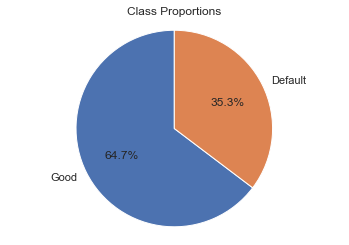

In [579]:
# Calculate class proportions
class_counts = np.bincount(df_loan_default['classification_label'])
labels = ['Good', 'Default']

# Create a pie chart
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Proportions')
plt.show()

client burea csv

In [580]:
df_client_burea['CLASS'] = df_client_burea['CLASS'].map({'STANDARD':0, 'PREMIUM':1})

In [581]:
df_client_burea

,UID,SCORE,CLASS
0,440ba427-f46a-41d7-bf6d-5b5b1eb3cc26,524.0,0
1,8d5f1532-453d-4cce-9ae6-23a06affa479,601.0,0
2,59ade0ad-460f-49d6-9b3d-359610bee8dd,507.0,0
3,73252b25-3564-4b73-a27e-a08c2a5e882b,519.0,1
4,c85f7e49-61da-42d1-bcf9-ae68c3af7ac8,567.0,1
...,...,...,...
16342,eb1eeb99-42d3-497f-9868-7e293f3e771f,652.0,0
16343,789328fd-7171-4963-bd3e-bd954e212be6,627.0,1
16344,4b8275bb-2268-4057-bf1a-5cb3e301a773,652.0,0
16345,cffa2c2c-a917-4247-aa55-1b6d017a4c54,606.0,1


mergning burea and loan_default

In [582]:
df_burea_loan_default = pd.merge(df_client_burea,df_loan_default, on = ['UID'])

In [583]:
df_burea_loan_default

,UID,SCORE,CLASS,RECORDNUMBER,OPENBALANCE,REPAYPERIOD,days_without_service,days_with_service,classification_label
0,440ba427-f46a-41d7-bf6d-5b5b1eb3cc26,524.0,0,1,15000.0,60.0,0.0,1003.0,1.0
1,8d5f1532-453d-4cce-9ae6-23a06affa479,601.0,0,5,480.0,24.0,25.0,700.0,0.0
2,59ade0ad-460f-49d6-9b3d-359610bee8dd,507.0,0,2,71.0,12.0,31.0,546.0,1.0
3,73252b25-3564-4b73-a27e-a08c2a5e882b,519.0,1,5,366.0,12.0,0.0,761.0,1.0
4,bd6ec7e6-7eae-4a38-b7f5-143218db4723,583.0,1,3,552.0,24.0,21.0,700.0,0.0
...,...,...,...,...,...,...,...,...,...
11951,b683c42b-525c-4eed-b991-2322e9aecde8,658.0,0,8,480.0,24.0,0.0,365.0,0.0
11952,eb1eeb99-42d3-497f-9868-7e293f3e771f,652.0,0,12,10028.0,60.0,1187.0,153.0,0.0
11953,4b8275bb-2268-4057-bf1a-5cb3e301a773,652.0,0,10,6565.0,24.0,0.0,670.0,0.0
11954,cffa2c2c-a917-4247-aa55-1b6d017a4c54,606.0,1,6,1029.0,12.0,0.0,670.0,1.0


client info csv

In [584]:
df_client_info

,UID,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_280,F_281,F_282,F_283,F_284,F_285,F_286,F_287,F_288,F_289
0,a2166667-0cc1-4f1d-89da-974446920301,565.0,NaN,102.0,116.0,104.0,0.0,603.0,102.0,116.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0
1,d1def6ea-4557-4629-aeef-89a384889d68,657.0,NaN,101.0,0.0,0.0,0.0,680.0,101.0,0.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0
2,29d200c0-97cd-452b-b9f1-bcd940ba059a,605.0,NaN,102.0,203.0,0.0,0.0,636.0,102.0,203.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0
3,a21f04c5-ab93-48b3-8bfc-868f84aa7a09,679.0,NaN,506.0,104.0,0.0,0.0,722.0,506.0,104.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0
4,2ed6bbc9-980a-4686-a585-aef5e2655ac2,586.0,NaN,102.0,104.0,112.0,0.0,614.0,102.0,104.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,87cf2d24-d99c-4089-b834-7ef26c246762,532.0,NaN,102.0,203.0,116.0,104.0,598.0,102.0,203.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0
16343,c48a9ede-d522-4e14-963b-c1e3f918002d,584.0,NaN,112.0,116.0,104.0,302.0,613.0,112.0,116.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0
16344,019a9871-f094-4731-9793-8e3de0ecd3b4,539.0,NaN,102.0,203.0,116.0,104.0,575.0,102.0,203.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0
16345,ee0608e1-0b85-4835-bdde-053f37cabd86,576.0,NaN,112.0,104.0,114.0,302.0,589.0,112.0,104.0,...,ND,ND,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0,-999997.0


In [585]:
df_client_info = df_client_info.replace(-999997.0,np.nan)

In [586]:
df_client_info

,UID,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_280,F_281,F_282,F_283,F_284,F_285,F_286,F_287,F_288,F_289
0,a2166667-0cc1-4f1d-89da-974446920301,565.0,NaN,102.0,116.0,104.0,0.0,603.0,102.0,116.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d1def6ea-4557-4629-aeef-89a384889d68,657.0,NaN,101.0,0.0,0.0,0.0,680.0,101.0,0.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29d200c0-97cd-452b-b9f1-bcd940ba059a,605.0,NaN,102.0,203.0,0.0,0.0,636.0,102.0,203.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a21f04c5-ab93-48b3-8bfc-868f84aa7a09,679.0,NaN,506.0,104.0,0.0,0.0,722.0,506.0,104.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2ed6bbc9-980a-4686-a585-aef5e2655ac2,586.0,NaN,102.0,104.0,112.0,0.0,614.0,102.0,104.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,87cf2d24-d99c-4089-b834-7ef26c246762,532.0,NaN,102.0,203.0,116.0,104.0,598.0,102.0,203.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16343,c48a9ede-d522-4e14-963b-c1e3f918002d,584.0,NaN,112.0,116.0,104.0,302.0,613.0,112.0,116.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16344,019a9871-f094-4731-9793-8e3de0ecd3b4,539.0,NaN,102.0,203.0,116.0,104.0,575.0,102.0,203.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16345,ee0608e1-0b85-4835-bdde-053f37cabd86,576.0,NaN,112.0,104.0,114.0,302.0,589.0,112.0,104.0,...,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [587]:
# Dropping duplicate columns
df_client_info = df_client_info.T.drop_duplicates().T
df_client_info

,UID,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_12,F_17,...,F_249,F_254,F_255,F_256,F_260,F_261,F_266,F_267,F_272,F_273
0,a2166667-0cc1-4f1d-89da-974446920301,565.0,NaN,102.0,116.0,104.0,0.0,603.0,564.0,25.0,...,12.0,499.0,11.0,0.0,601.0,19.0,522.0,13.0,521.0,20.0
1,d1def6ea-4557-4629-aeef-89a384889d68,657.0,NaN,101.0,0.0,0.0,0.0,680.0,637.0,20.0,...,12.0,541.0,11.0,0.0,676.0,19.0,616.0,13.0,601.0,20.0
2,29d200c0-97cd-452b-b9f1-bcd940ba059a,605.0,NaN,102.0,203.0,0.0,0.0,636.0,598.0,8.0,...,12.0,526.0,11.0,0.0,611.0,19.0,554.0,13.0,543.0,20.0
3,a21f04c5-ab93-48b3-8bfc-868f84aa7a09,679.0,NaN,506.0,104.0,0.0,0.0,722.0,682.0,17.0,...,12.0,558.0,11.0,0.0,670.0,19.0,639.0,13.0,634.0,20.0
4,2ed6bbc9-980a-4686-a585-aef5e2655ac2,586.0,NaN,102.0,104.0,112.0,0.0,614.0,567.0,9.0,...,12.0,523.0,11.0,0.0,611.0,19.0,552.0,13.0,513.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,87cf2d24-d99c-4089-b834-7ef26c246762,532.0,NaN,102.0,203.0,116.0,104.0,598.0,585.0,61.0,...,12.0,560.0,11.0,0.0,618.0,19.0,521.0,13.0,560.0,20.0
16343,c48a9ede-d522-4e14-963b-c1e3f918002d,584.0,NaN,112.0,116.0,104.0,302.0,613.0,581.0,28.0,...,12.0,527.0,11.0,0.0,615.0,19.0,563.0,13.0,593.0,20.0
16344,019a9871-f094-4731-9793-8e3de0ecd3b4,539.0,NaN,102.0,203.0,116.0,104.0,575.0,537.0,10.0,...,12.0,509.0,11.0,0.0,616.0,19.0,520.0,13.0,493.0,20.0
16345,ee0608e1-0b85-4835-bdde-053f37cabd86,576.0,NaN,112.0,104.0,114.0,302.0,589.0,571.0,10.0,...,12.0,532.0,11.0,0.0,666.0,19.0,557.0,13.0,526.0,20.0


In [588]:
# Dropping dataframe columns with only one distinct value
df_client_info = df_client_info.loc[:,df_client_info.apply(pd.Series.nunique) != 1]
df_client_info

,UID,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_12,F_17,...,F_230,F_231,F_232,F_236,F_242,F_248,F_254,F_260,F_266,F_272
0,a2166667-0cc1-4f1d-89da-974446920301,565.0,NaN,102.0,116.0,104.0,0.0,603.0,564.0,25.0,...,0.0,NaN,NaN,539.0,578.0,573.0,499.0,601.0,522.0,521.0
1,d1def6ea-4557-4629-aeef-89a384889d68,657.0,NaN,101.0,0.0,0.0,0.0,680.0,637.0,20.0,...,0.0,NaN,NaN,632.0,660.0,630.0,541.0,676.0,616.0,601.0
2,29d200c0-97cd-452b-b9f1-bcd940ba059a,605.0,NaN,102.0,203.0,0.0,0.0,636.0,598.0,8.0,...,0.0,NaN,NaN,593.0,613.0,579.0,526.0,611.0,554.0,543.0
3,a21f04c5-ab93-48b3-8bfc-868f84aa7a09,679.0,NaN,506.0,104.0,0.0,0.0,722.0,682.0,17.0,...,0.0,NaN,NaN,644.0,671.0,643.0,558.0,670.0,639.0,634.0
4,2ed6bbc9-980a-4686-a585-aef5e2655ac2,586.0,NaN,102.0,104.0,112.0,0.0,614.0,567.0,9.0,...,0.0,NaN,NaN,559.0,575.0,575.0,523.0,611.0,552.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,87cf2d24-d99c-4089-b834-7ef26c246762,532.0,NaN,102.0,203.0,116.0,104.0,598.0,585.0,61.0,...,0.0,NaN,3.0,523.0,640.0,572.0,560.0,618.0,521.0,560.0
16343,c48a9ede-d522-4e14-963b-c1e3f918002d,584.0,NaN,112.0,116.0,104.0,302.0,613.0,581.0,28.0,...,0.0,NaN,NaN,600.0,588.0,607.0,527.0,615.0,563.0,593.0
16344,019a9871-f094-4731-9793-8e3de0ecd3b4,539.0,NaN,102.0,203.0,116.0,104.0,575.0,537.0,10.0,...,0.0,NaN,NaN,512.0,569.0,542.0,509.0,616.0,520.0,493.0
16345,ee0608e1-0b85-4835-bdde-053f37cabd86,576.0,NaN,112.0,104.0,114.0,302.0,589.0,571.0,10.0,...,0.0,NaN,NaN,562.0,583.0,582.0,532.0,666.0,557.0,526.0


merging client and burea_loan_default

In [589]:
df_client_burea_loan_default = pd.merge(df_client_info,df_burea_loan_default, on = ['UID'])

In [590]:
df_client_burea_loan_default = df_client_burea_loan_default.drop(columns=['UID', 'REPAYPERIOD'])

In [591]:
df_client_burea_loan_default

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_12,F_17,F_18,...,F_260,F_266,F_272,SCORE,CLASS,RECORDNUMBER,OPENBALANCE,days_without_service,days_with_service,classification_label
0,565.0,NaN,102.0,116.0,104.0,0.0,603.0,564.0,25.0,122.0,...,601.0,522.0,521.0,565.0,0,1,4530.0,0.0,516.0,0.0
1,657.0,NaN,101.0,0.0,0.0,0.0,680.0,637.0,20.0,169.0,...,676.0,616.0,601.0,657.0,0,10,6686.0,0.0,944.0,0.0
2,631.0,NaN,104.0,506.0,0.0,0.0,662.0,653.0,6.0,53.0,...,707.0,616.0,574.0,631.0,1,5,1000.0,25.0,92.0,0.0
3,674.0,NaN,101.0,0.0,0.0,0.0,714.0,656.0,27.0,326.0,...,691.0,617.0,591.0,674.0,1,7,13952.0,0.0,761.0,0.0
4,570.0,NaN,102.0,203.0,112.0,116.0,627.0,579.0,28.0,191.0,...,567.0,512.0,546.0,570.0,1,3,2500.0,0.0,365.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11951,569.0,NaN,112.0,101.0,103.0,116.0,607.0,561.0,11.0,187.0,...,616.0,536.0,563.0,569.0,0,9,5044.0,386.0,1126.0,0.0
11952,508.0,NaN,102.0,101.0,116.0,104.0,555.0,518.0,13.0,19.0,...,615.0,485.0,436.0,508.0,0,11,2013.0,10.0,214.0,1.0
11953,532.0,NaN,102.0,203.0,116.0,104.0,598.0,585.0,61.0,196.0,...,618.0,521.0,560.0,532.0,0,14,1899.0,13.0,1310.0,1.0
11954,584.0,NaN,112.0,116.0,104.0,302.0,613.0,581.0,28.0,90.0,...,615.0,563.0,593.0,584.0,0,13,7500.0,0.0,122.0,0.0


In [592]:
# Drop columns with more than 70% missing values
threshold = 0.7 * len(df_client_info)
df_client_burea_loan_default = df_client_burea_loan_default.dropna(axis=1, thresh=threshold)
np.array(df_client_burea_loan_default.isnull().sum())

array([  0,   0,   0,   0,   0,   0,   0,   0,   8,   0,   0,   8,   0,
         0,   0,   0,   0,   0,   0,   8,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  61,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 313, 313, 313,   0, 341,   8,   9, 308, 422, 255, 311,   9,
         9,  18,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int64)

In [593]:
# filling remaining null with column average
df_client_burea_loan_default = df_client_burea_loan_default.fillna(df_client_burea_loan_default.mean())

In [594]:
df_client_burea_loan_default.to_csv('df_client_burea_loan_default.csv',index=False,sep=',')

In [595]:
df_client_burea_loan_default = pd.read_csv('df_client_burea_loan_default.csv')

In [596]:
# drop all the column with mix data types
df_client_burea_loan_default = df_client_burea_loan_default.drop(columns=list(df_client_burea_loan_default.select_dtypes(include='object')))

### Feature selection ###

In [597]:
df_x = df_client_burea_loan_default.iloc[:,:-1]
df_y = df_client_burea_loan_default.iloc[:,-1]

In [598]:
df_x

,F_1,F_3,F_4,F_5,F_6,F_7,F_12,F_17,F_18,F_19,...,F_254,F_260,F_266,F_272,SCORE,CLASS,RECORDNUMBER,OPENBALANCE,days_without_service,days_with_service
0,565.0,102.0,116.0,104.0,0.0,603.0,564.0,25.0,122.0,13.0,...,499.0,601.0,522.0,521.0,565.0,0,1,4530.0,0.0,516.0
1,657.0,101.0,0.0,0.0,0.0,680.0,637.0,20.0,169.0,13.0,...,541.0,676.0,616.0,601.0,657.0,0,10,6686.0,0.0,944.0
2,631.0,104.0,506.0,0.0,0.0,662.0,653.0,6.0,53.0,5.0,...,545.0,707.0,616.0,574.0,631.0,1,5,1000.0,25.0,92.0
3,674.0,101.0,0.0,0.0,0.0,714.0,656.0,27.0,326.0,13.0,...,556.0,691.0,617.0,591.0,674.0,1,7,13952.0,0.0,761.0
4,570.0,102.0,203.0,112.0,116.0,627.0,579.0,28.0,191.0,17.0,...,519.0,567.0,512.0,546.0,570.0,1,3,2500.0,0.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11951,569.0,112.0,101.0,103.0,116.0,607.0,561.0,11.0,187.0,6.0,...,556.0,616.0,536.0,563.0,569.0,0,9,5044.0,386.0,1126.0
11952,508.0,102.0,101.0,116.0,104.0,555.0,518.0,13.0,19.0,8.0,...,468.0,615.0,485.0,436.0,508.0,0,11,2013.0,10.0,214.0
11953,532.0,102.0,203.0,116.0,104.0,598.0,585.0,61.0,196.0,12.0,...,560.0,618.0,521.0,560.0,532.0,0,14,1899.0,13.0,1310.0
11954,584.0,112.0,116.0,104.0,302.0,613.0,581.0,28.0,90.0,16.0,...,527.0,615.0,563.0,593.0,584.0,0,13,7500.0,0.0,122.0


In [599]:
# normalize

from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
df_x[df_x.columns] = scaler.fit_transform(df_x[df_x.columns])
df_x.head()

,F_1,F_3,F_4,F_5,F_6,F_7,F_12,F_17,F_18,F_19,...,F_254,F_260,F_266,F_272,SCORE,CLASS,RECORDNUMBER,OPENBALANCE,days_without_service,days_with_service
0,0.382900,0.201581,0.229249,0.205534,0.000000,0.362869,0.326165,0.999927,0.999371,0.240741,...,0.342105,0.394464,0.367089,0.387574,0.382900,0.0,0.000000,0.077411,0.000000,0.238447
1,0.724907,0.199605,0.000000,0.000000,0.000000,0.687764,0.587814,0.999922,0.999418,0.240741,...,0.618421,0.653979,0.763713,0.624260,0.724907,0.0,0.692308,0.114253,0.000000,0.436229
2,0.628253,0.205534,1.000000,0.000000,0.000000,0.611814,0.645161,0.999908,0.999303,0.092593,...,0.644737,0.761246,0.763713,0.544379,0.628253,1.0,0.307692,0.017088,0.005025,0.042514
3,0.788104,0.199605,0.000000,0.000000,0.000000,0.831224,0.655914,0.999929,0.999575,0.240741,...,0.717105,0.705882,0.767932,0.594675,0.788104,1.0,0.461538,0.238418,0.000000,0.351664
4,0.401487,0.201581,0.401186,0.221344,0.229249,0.464135,0.379928,0.999930,0.999440,0.314815,...,0.473684,0.276817,0.324895,0.461538,0.401487,1.0,0.153846,0.042721,0.000000,0.168669


In [600]:
# droping columns with Variance Thresholding 

from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(df_x)
df_x.columns[var_thres.get_support()]
constant_columns = [column for column in df_x.columns if column not in df_x.columns[var_thres.get_support()]]
df_x = df_x.drop(constant_columns,axis=1)
df_x

,F_1,F_3,F_4,F_5,F_6,F_7,F_12,F_30,F_60,F_61,...,F_248,F_254,F_260,F_266,F_272,SCORE,CLASS,RECORDNUMBER,OPENBALANCE,days_with_service
0,0.382900,0.201581,0.229249,0.205534,0.000000,0.362869,0.326165,0.0,0.1,0.181818,...,0.462264,0.342105,0.394464,0.367089,0.387574,0.382900,0.0,0.000000,0.077411,0.238447
1,0.724907,0.199605,0.000000,0.000000,0.000000,0.687764,0.587814,0.0,0.2,0.272727,...,0.731132,0.618421,0.653979,0.763713,0.624260,0.724907,0.0,0.692308,0.114253,0.436229
2,0.628253,0.205534,1.000000,0.000000,0.000000,0.611814,0.645161,0.0,0.1,0.090909,...,0.660377,0.644737,0.761246,0.763713,0.544379,0.628253,1.0,0.307692,0.017088,0.042514
3,0.788104,0.199605,0.000000,0.000000,0.000000,0.831224,0.655914,0.0,0.2,0.272727,...,0.768868,0.717105,0.705882,0.767932,0.594675,0.788104,1.0,0.461538,0.238418,0.351664
4,0.401487,0.201581,0.401186,0.221344,0.229249,0.464135,0.379928,0.0,0.0,0.000000,...,0.481132,0.473684,0.276817,0.324895,0.461538,0.401487,1.0,0.153846,0.042721,0.168669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11951,0.397770,0.221344,0.199605,0.203557,0.229249,0.379747,0.315412,0.0,0.0,0.000000,...,0.452830,0.717105,0.446367,0.426160,0.511834,0.397770,0.0,0.615385,0.086194,0.520333
11952,0.171004,0.201581,0.199605,0.229249,0.205534,0.160338,0.161290,0.0,0.0,0.000000,...,0.122642,0.138158,0.442907,0.210970,0.136095,0.171004,0.0,0.769231,0.034399,0.098891
11953,0.260223,0.201581,0.401186,0.229249,0.205534,0.341772,0.401434,1.0,0.1,0.090909,...,0.457547,0.743421,0.453287,0.362869,0.502959,0.260223,0.0,1.000000,0.032451,0.605360
11954,0.453532,0.221344,0.229249,0.205534,0.596838,0.405063,0.387097,0.0,0.4,0.454545,...,0.622642,0.526316,0.442907,0.540084,0.600592,0.453532,0.0,0.923077,0.128164,0.056377


In [601]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [602]:
# finding all features with 80% corelation and dropping them
corr_features = correlation(df_x, 0.8)
len(set(corr_features))
df_x = df_x.drop(corr_features,axis=1)

In [603]:
df_x

,F_1,F_3,F_4,F_5,F_6,F_30,F_60,F_65,F_77,F_81,F_123,F_131,F_133,F_134,F_260,CLASS,RECORDNUMBER,OPENBALANCE,days_with_service
0,0.382900,0.201581,0.229249,0.205534,0.000000,0.0,0.1,0.193548,0.352941,0.028846,0.424242,1.0,1.0,1.0,0.394464,0.0,0.000000,0.077411,0.238447
1,0.724907,0.199605,0.000000,0.000000,0.000000,0.0,0.2,0.000000,0.235294,0.000000,0.333333,1.0,0.0,1.0,0.653979,0.0,0.692308,0.114253,0.436229
2,0.628253,0.205534,1.000000,0.000000,0.000000,0.0,0.1,0.000000,0.176471,0.000000,0.151515,1.0,0.0,1.0,0.761246,1.0,0.307692,0.017088,0.042514
3,0.788104,0.199605,0.000000,0.000000,0.000000,0.0,0.2,0.000000,0.294118,0.000000,0.515152,1.0,0.0,0.0,0.705882,1.0,0.461538,0.238418,0.351664
4,0.401487,0.201581,0.401186,0.221344,0.229249,0.0,0.0,0.387097,0.176471,0.038462,0.363636,1.0,1.0,0.0,0.276817,1.0,0.153846,0.042721,0.168669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11951,0.397770,0.221344,0.199605,0.203557,0.229249,0.0,0.0,0.032258,0.176471,0.038462,0.151515,1.0,0.0,0.0,0.446367,0.0,0.615385,0.086194,0.520333
11952,0.171004,0.201581,0.199605,0.229249,0.205534,0.0,0.0,0.225806,0.058824,0.115385,0.181818,1.0,0.0,1.0,0.442907,0.0,0.769231,0.034399,0.098891
11953,0.260223,0.201581,0.401186,0.229249,0.205534,1.0,0.1,0.258065,0.235294,0.086538,0.363636,1.0,0.0,1.0,0.453287,0.0,1.000000,0.032451,0.605360
11954,0.453532,0.221344,0.229249,0.205534,0.596838,0.0,0.4,0.000000,0.294118,0.000000,0.454545,1.0,1.0,1.0,0.442907,0.0,0.923077,0.128164,0.056377


<AxesSubplot:>

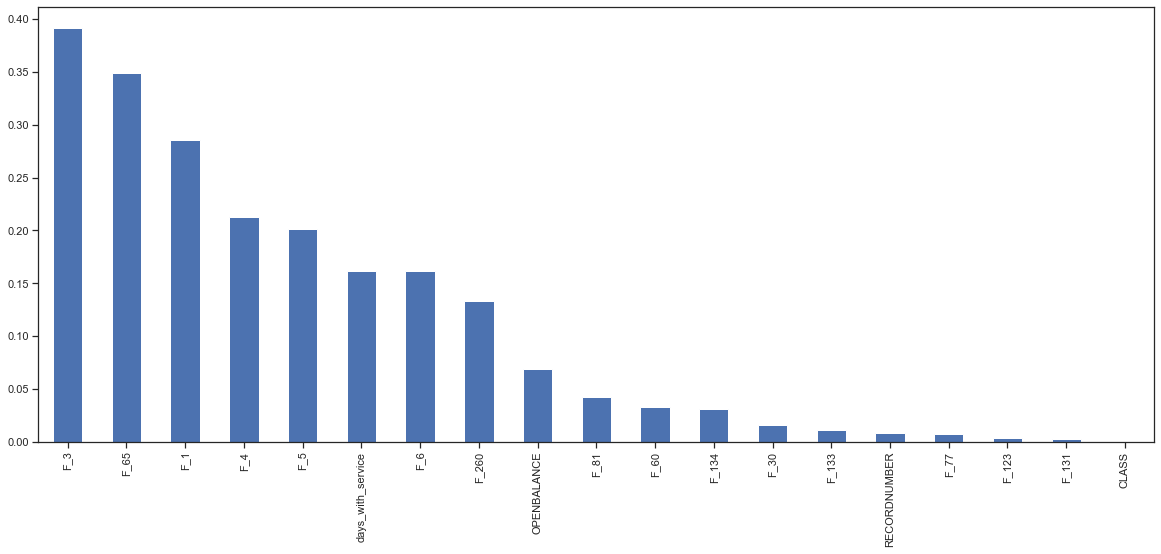

In [555]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(df_x, df_y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_x.columns
mm_value = mutual_info.sort_values(ascending=False)
mm_value.plot.bar(figsize=(20, 8))

In [612]:
# Set a threshold for mutual_info_classif values (adjust as needed)
threshold = 0.1  # You can choose your threshold

# Identify columns with mutual_info_classif values below the threshold
low_mi_columns = df_x.columns[mutual_info < threshold]

# Drop columns with low mutual_info_classif values
df_x = df_x.drop(columns=low_mi_columns)

# Print the DataFrame after dropping low mutual_info_classif columns
print("DataFrame after dropping columns with low mutual_info_classif values:")
df_x

DataFrame after dropping columns with low mutual_info_classif values:


,F_1,F_3,F_4,F_5,F_6,F_65,F_260,days_with_service
0,0.382900,0.201581,0.229249,0.205534,0.000000,0.193548,0.394464,0.238447
1,0.724907,0.199605,0.000000,0.000000,0.000000,0.000000,0.653979,0.436229
2,0.628253,0.205534,1.000000,0.000000,0.000000,0.000000,0.761246,0.042514
3,0.788104,0.199605,0.000000,0.000000,0.000000,0.000000,0.705882,0.351664
4,0.401487,0.201581,0.401186,0.221344,0.229249,0.387097,0.276817,0.168669
...,...,...,...,...,...,...,...,...
11951,0.397770,0.221344,0.199605,0.203557,0.229249,0.032258,0.446367,0.520333
11952,0.171004,0.201581,0.199605,0.229249,0.205534,0.225806,0.442907,0.098891
11953,0.260223,0.201581,0.401186,0.229249,0.205534,0.258065,0.453287,0.605360
11954,0.453532,0.221344,0.229249,0.205534,0.596838,0.000000,0.442907,0.056377


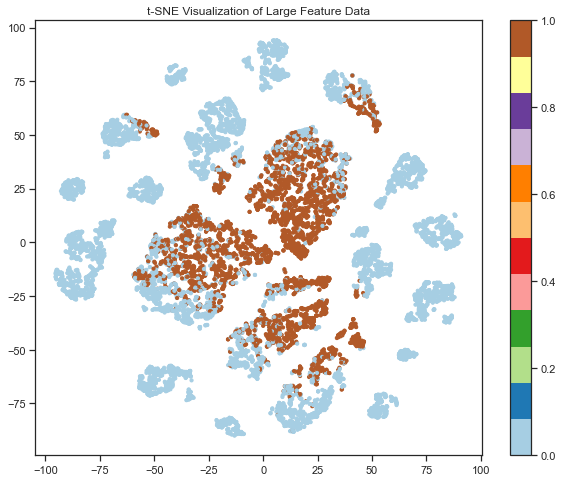

In [613]:
from sklearn.manifold import TSNE

# Generate or load your large feature dataset (X) and corresponding labels (y)
# X should be a NumPy array with shape (n_samples, n_features)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_x)

# Plot the reduced-dimensional data
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_y, cmap=plt.cm.Paired, marker='o', s=10)
plt.title('t-SNE Visualization of Large Feature Data')
plt.colorbar()
plt.show()

In [618]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

X = df_x
y = df_y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store classifier names and corresponding classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier()
}

# Define hyperparameter grids for each classifier
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1.0, 10.0]},
    'Support Vector Machine': {'C': [0.01, 0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Gradient Boosting': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2, 0.3]},
    'K-Nearest Neighbors': {'n_neighbors': [1, 3, 5, 7]},
    'Naive Bayes': {},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100, 50), (100, 100)]}
}

# Create a dictionary to store the best classifiers and their corresponding parameters
best_classifiers = {}

# Iterate through classifiers and perform GridSearchCV
for clf_name, clf in classifiers.items():
    param_grid = param_grids.get(clf_name, {})  # Get the corresponding parameter grid
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best classifier and its parameters
    best_classifier = grid_search.best_estimator_
    best_parameters = grid_search.best_params_
    
    # Store the best classifier and parameters in the dictionary
    best_classifiers[clf_name] = {'best_classifier': best_classifier, 'best_parameters': best_parameters}

# Evaluate the best classifiers on the test set
results = []

for clf_name, clf_info in best_classifiers.items():
    best_classifier = clf_info['best_classifier']
    y_pred = best_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([clf_name, accuracy, precision, recall, f1])

# Display results
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
               Classifier  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.907191   0.858945  0.883255  0.870930
1  Support Vector Machine  0.921823   0.858072  0.933962  0.894410
2           Random Forest  0.930602   0.868251  0.948113  0.906426
3       Gradient Boosting  0.931438   0.881696  0.931604  0.905963
4     K-Nearest Neighbors  0.911371   0.857303  0.899764  0.878021
5             Naive Bayes  0.888796   0.761691  0.998821  0.864286
6           Decision Tree  0.920987   0.860109  0.

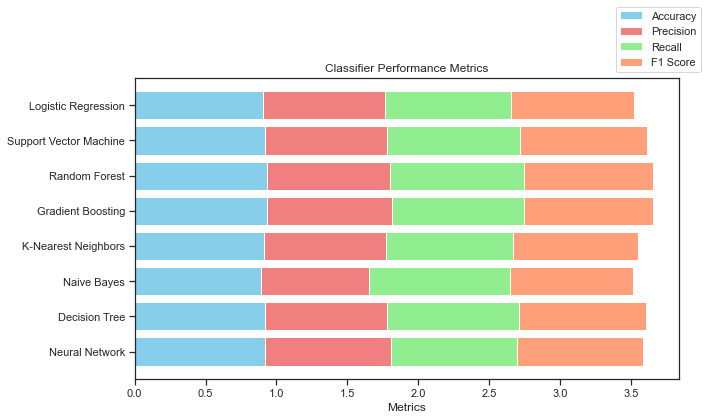

In [622]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(results_df['Classifier'], results_df['Accuracy'], color='skyblue', label='Accuracy')
plt.barh(results_df['Classifier'], results_df['Precision'], color='lightcoral', left=results_df['Accuracy'], label='Precision')
plt.barh(results_df['Classifier'], results_df['Recall'], color='lightgreen', left=results_df['Accuracy'] + results_df['Precision'], label='Recall')
plt.barh(results_df['Classifier'], results_df['F1 Score'], color='lightsalmon', left=results_df['Accuracy'] + results_df['Precision'] + results_df['Recall'], label='F1 Score')

# Add labels and legend
plt.xlabel('Metrics')
plt.title('Classifier Performance Metrics')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the best-performing classifier at the top
plt.tight_layout()
plt.show()